# **Multiple Linear Regression**

### Importing All Necessary Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Data Framing

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
# Check data shape
df.shape

(2443651, 9)

In [4]:
# Check null values
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [5]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


### **Preprocessing**

Convert columns to the appropriate data types

In [6]:
columns_to_conv_int = ['uid', 'reviews', 'boughtInLastMonth']

for column in columns_to_conv_int:
    df[column] = df[column].astype(int)

In [7]:
columns_to_conv_float = ['stars', 'price']

for column in columns_to_conv_float:
    df[column] = df[column].astype(float)

In [8]:
# Convert 'isBestSeller' to boolean using apply
df['isBestSeller'] = df['isBestSeller'].astype(str).apply(lambda x: x.strip().lower() == 'true')
df['isBestSeller'] = df['isBestSeller'].astype(int)
print(df.head()) 

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99             0                  0  Hi-Fi Speakers  
1    98099  23.99             1                  0  Hi-Fi Speakers  
2    15308  21.99             0                  0  Hi-Fi Speakers  
3     7205  31.99             0                  0  Hi-Fi Speakers  
4     1881  17.99             0                  0  Hi-Fi Speakers  


### Converting textual data into numerical

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['category_label'] = label_encoder.fit_transform(df['category'])
print(df.head())

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  \
0    15308  21.99             0                  0  Hi-Fi Speakers   
1    98099  23.99             1                  0  Hi-Fi Speakers   
2    15308  21.99             0                  0  Hi-Fi Speakers   
3     7205  31.99             0                  0  Hi-Fi Speakers   
4     1881  17.99             0                  0  Hi-Fi Speakers   

   category_label  
0             130  
1             130  
2             130  
3             130 

### Plotting heatmap between some columns to know their relationship

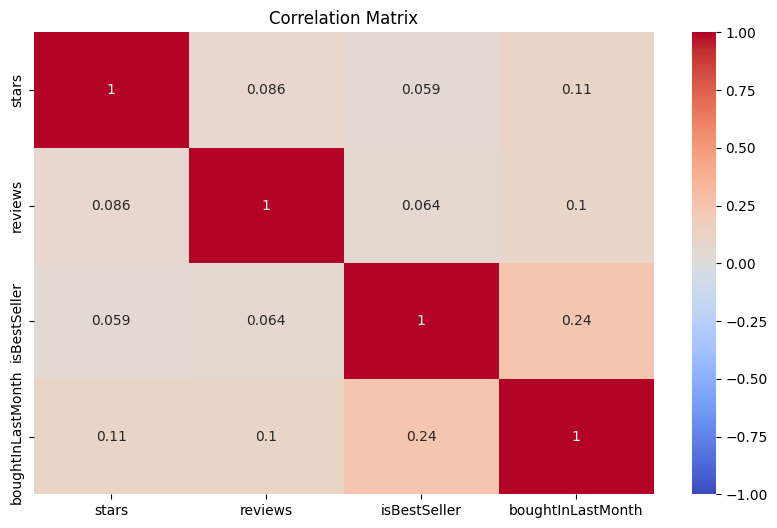

In [10]:
plt.figure(figsize=(10, 6))
corr_matrix = df[['stars', 'reviews', 'isBestSeller', 'boughtInLastMonth']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Saving processed data to CSV file

In [11]:
df.to_csv('processed_data.csv', index=False)

In [12]:
X = df[["stars", "reviews", "isBestSeller", "boughtInLastMonth", "category_label"]].values  
#.values is converting dataframe into array
print(X)
y = df[["price"]].values
print(y)     

[[4.7000e+00 1.5308e+04 0.0000e+00 0.0000e+00 1.3000e+02]
 [4.7000e+00 9.8099e+04 1.0000e+00 0.0000e+00 1.3000e+02]
 [4.7000e+00 1.5308e+04 0.0000e+00 0.0000e+00 1.3000e+02]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.9600e+02]
 [4.3000e+00 4.0400e+02 0.0000e+00 0.0000e+00 1.9600e+02]
 [4.5000e+00 3.4000e+01 0.0000e+00 0.0000e+00 1.9600e+02]]
[[21.99]
 [23.99]
 [21.99]
 ...
 [52.99]
 [79.99]
 [53.99]]


### **Splitting Dataset**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### **Training the Model**
using Linear regression model to train on x and y

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### **Prediction**

Predicting the Price by giving an multiple inputs ("stars", "reviews", "isBestSeller", "boughtInLastMonth", "category_label")

In [15]:
y_pred = model.predict(X_test)
#Comparison
print('- y_pred : ')
print(y_pred)
print('- y_test : ')
print(y_test)

- y_pred : 
[[131.51317717]
 [131.8851829 ]
 [ 33.91365853]
 ...
 [131.85796297]
 [131.8851829 ]
 [131.8851829 ]]
- y_test : 
[[  87.72]
 [   9.94]
 [   9.43]
 ...
 [  69.99]
 [1989.81]
 [  14.62]]


### Plotting the regression line for necessary columns

C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Noor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegre

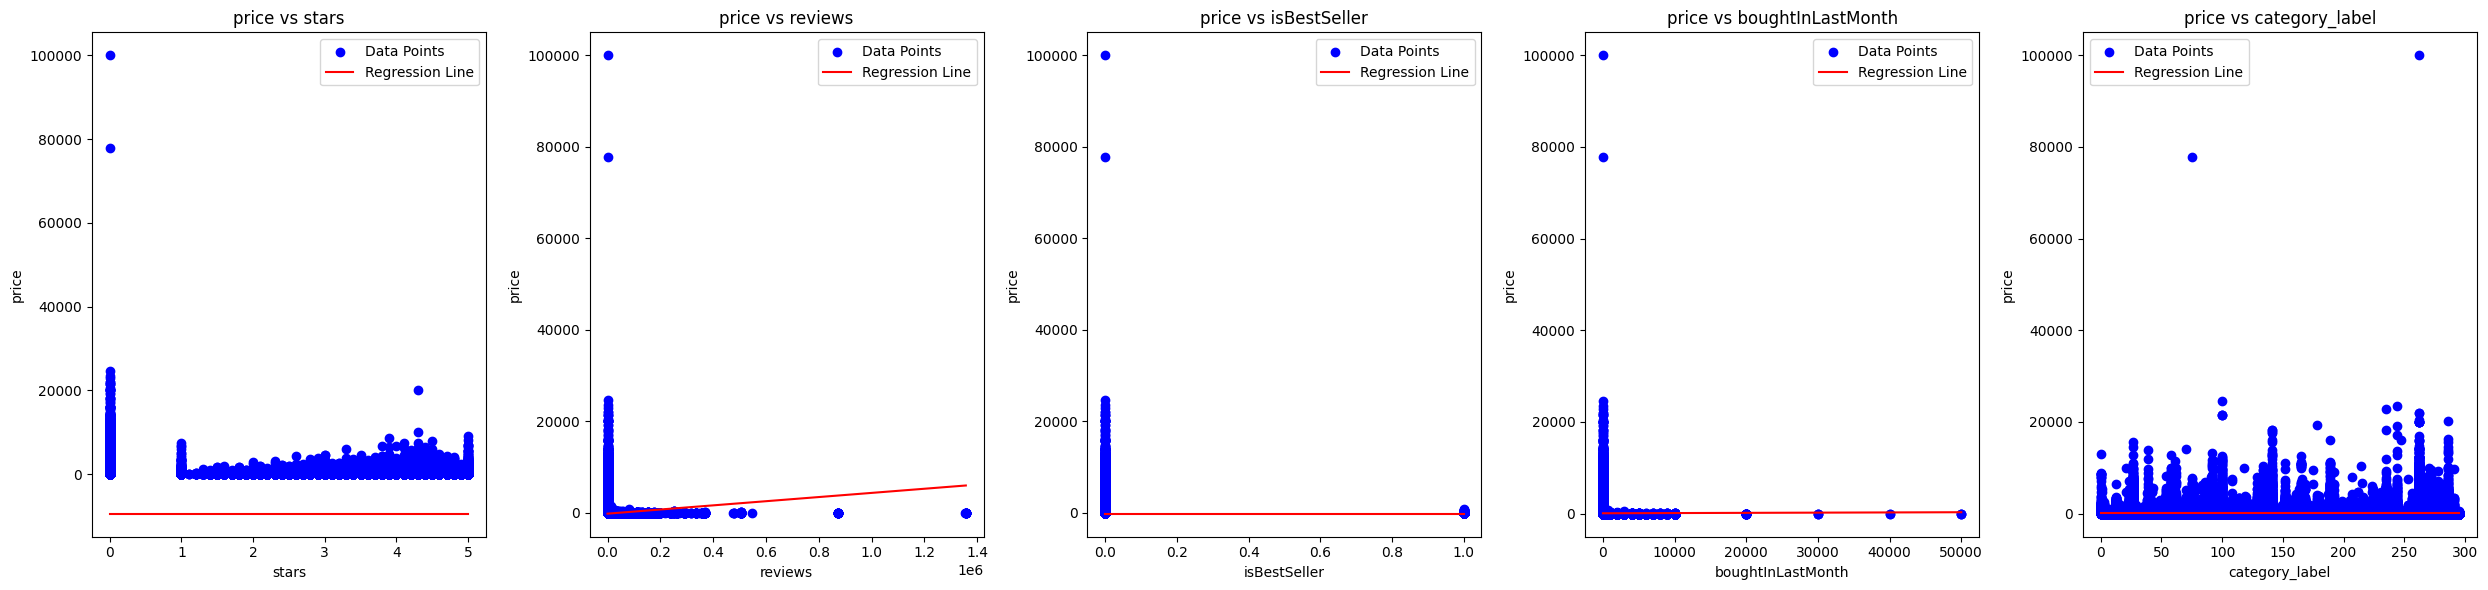

In [16]:
import numpy as np

# Plot regression lines
def plot_regression_lines(X, y, model):
    features = X.columns
    num_features = len(features)
    fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 6))

    for i, feature in enumerate(features):
        ax = axes[i]
        feature_range = np.linspace(X[feature].min(), X[feature].max(), 100)
        feature_means = X.mean().to_dict()
        feature_means.pop(feature)
        mean_values = pd.DataFrame([feature_means] * 100)
        mean_values[feature] = feature_range
        y_pred_feature = model.predict(mean_values)

        ax.scatter(X[feature], y, color='blue', label='Data Points')
        ax.plot(feature_range, y_pred_feature, color='red', label='Regression Line')
        ax.set_xlabel(feature)
        ax.set_ylabel('price')
        ax.legend()
        ax.set_title(f'price vs {feature}')

    plt.tight_layout()
    plt.show()

# Plot the regression lines
X = df[["stars", "reviews", "isBestSeller", "boughtInLastMonth", "category_label"]]
y = df[["price"]]  
plot_regression_lines(X, y, model)

### Calculating Mean Absolute Error (MAE), Mean Squared Error (MSE) and R-squared value

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 112.39299928503006
Mean Squared Error: 123874.11693733954
R-squared: 0.014933270198290383


In [18]:
print(y_pred.sum().mean())
print(y_test.sum().mean())

print("So called Accuracy ", y_pred.sum().mean()/y_test.sum().mean())

43669769.398818634
43460300.16999999
So called Accuracy  1.0048197832964634
